# Capstone: Data Loader



In [1]:
# Import the relevant modules to be used later
from __future__ import print_function
import gzip
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil
import struct
import sys

try: 
    from urllib.request import urlretrieve 
except ImportError: 
    from urllib import urlretrieve

# Config matplotlib for inline plotting
%matplotlib inline

## Data download

We will download the data onto the local machine. The MNIST database is a standard set of handwritten digits that has been widely used for training and testing of machine learning algorithms. It has a training set of 60,000 images and a test set of 10,000 images with each image being 28 x 28 grayscale pixels. This set is easy to use visualize and train on any computer.

In [2]:
# Functions to load MNIST images and unpack into train and test set.
# - loadData reads image data and formats into a 28x28 long array
# - loadLabels reads the corresponding labels data, 1 for each image
# - try_build packs the downloaded image and labels data into a combined format to be read later by 
#   CNTK text reader 

from skimage import io
import matplotlib.pyplot as plt
from numpy import genfromtxt


def loadData(pathSrc, type, cimg, crow=128, ccol=118):
    try:
        # for each png in the path
        # Read data.
        # this read intup numpy array
        init = True
        for item in sorted(os.listdir(pathSrc)): # loop through items in dir
            if item.endswith(type+".png"): # check for ".png" extension
                #print("   reading PNG {0} ...".format(item))
                file_name = os.path.join(pathSrc,item) # get full path of files
             
                if (init):
                    res =  np.ravel(io.imread(file_name,as_grey=True))
                    init = False
                else:
                    res = np.vstack( (res, np.ravel(io.imread(file_name,as_grey=True))) )
    finally:
        print("   Done loading images")
        
    return res



def loadLabels(pathSrc, cimg):
    try:
        # Read labels.
        #res = np.fromstring(gz.read(cimg), dtype = np.uint8)
        print("   Loading labels")
        
        #skip the header
        label_data = genfromtxt(pathSrc, delimiter=',',skip_header=1)
        num_rows, num_cols = label_data.shape
        #1-hot encode
        init = True
        for row in range(num_rows):
            
            if(init):
                res = np.array(int(label_data[row][1]))
                init = False
            else:
                res = np.vstack( (res, int(np.array(label_data[row][1]) )  ) )
                               
    finally:
        print("   Done loading labels")
    
    return res

def try_build(dataSrc, labelsSrc, cimg):
    data = loadData(dataSrc, cimg)
    labels = loadLabels(labelsSrc, cimg)
    return np.hstack((data, labels))



In [3]:
aLabel = loadLabels("/home/nbuser/library/data/Capstone/train_labels.csv", 5)
print(aLabel.shape)


   Loading labels
   Done loading labels
(988, 1)


In [4]:
aData_c = loadData("/home/nbuser/library/data/Capstone/train","_c", 1, 128,118 )
print(aData_c.shape)

   Done loading images
(988, 15104)


In [5]:
aData_v = loadData("/home/nbuser/library/data/Capstone/train","_v", 1, 128,118 )
print(aData_v.shape)

   Done loading images
(988, 15104)


In [6]:
train_c = np.hstack((aData_c, aLabel))
print(train_c.shape)

(988, 15105)


In [7]:
train_v = np.hstack((aData_v, aLabel))
print(train_v.shape)

(988, 15105)


In [8]:
#train_combo = np.vstack(train_c, train_v)
#print(train_combo.shape)

# Save the images

Save the images in a local directory. While saving the data we flatten the images to a vector (128x118 image pixels becomes an array of length 15104 data points).


The labels are encoded as [1-hot][] encoding (label of 3 with 11 digits becomes `00010000000`, where the first index corresponds to digit `0` and the last one corresponds to digit `9`.



[1-hot]: https://en.wikipedia.org/wiki/One-hot

In [9]:
# Save the data files into a format compatible with CNTK text reader
# there was something going on here where the labels were converted  to float and couldn't be used as index arrays
# also had to increase the np.eye size to 11 since we have 11 labels
def savetxt(filename, ndarray):
    dir = os.path.dirname(filename)

    if not os.path.exists(dir):
        os.makedirs(dir)

    if not os.path.isfile(filename):
        print("Saving", filename )
        with open(filename, 'w') as f:
            labels = list(map(' '.join, np.eye(11, dtype=np.uint).astype(str)))
            for row in ndarray:
                row_str = row.astype(str)
                #print(row[-1])
                label_str = labels[int(row[-1])]
                feature_str = ' '.join(row_str[:-1])
                f.write('|labels {} |features {}\n'.format(label_str, feature_str))
    else:
        print("File already exists", filename)


In [10]:
# Save the train and test files (prefer our default path for the data)

#print ('Writing train_combo text file...')
#savetxt(os.path.join("/home/nbuser/library/data/Capstone/", "Train_combo-128x118_cntk_text.txt"), train_c)

print ('Writing train_c text file...')
savetxt(os.path.join("/home/nbuser/library/data/Capstone/", "Train_c-128x118_cntk_text.txt"), train_c)

print ('Writing train_v text file...')
savetxt(os.path.join("/home/nbuser/library/data/Capstone/", "Train_v-128x118_cntk_text.txt"), train_v)

print('Done')

Writing train_c text file...
Saving /home/nbuser/library/data/Capstone/Train_c-128x118_cntk_text.txt
Writing train_v text file...
Saving /home/nbuser/library/data/Capstone/Train_v-128x118_cntk_text.txt
Done


In [11]:
res =  np.ravel(io.imread("/home/nbuser/library/data/Capstone/test/2059_v.png",as_grey=True))

In [12]:
res.shape
new = np.reshape(res,(128,118))

In [13]:
new.shape

(128, 118)

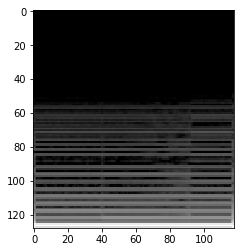

In [14]:
plt.imshow(new, cmap='gray')

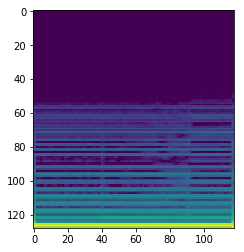

In [15]:
plt.imshow(io.imread("/home/nbuser/library/data/Capstone/test/2059_v.png",as_grey=True))

In [16]:
t = io.imread("/home/nbuser/library/data/Capstone/test/2059_v.png",as_grey=True)
t.shape

(128, 118)

In [17]:
print(t)

[[0.08322275 0.08322275 0.08322275 ... 0.08322275 0.08322275 0.08322275]
 [0.08322275 0.08322275 0.08322275 ... 0.08322275 0.08322275 0.08322275]
 [0.08322275 0.08322275 0.08322275 ... 0.08322275 0.08322275 0.08322275]
 ...
 [0.83113216 0.81525333 0.80746275 ... 0.80524549 0.80302824 0.78300471]
 [0.83113216 0.86126    0.86908039 ... 0.86320941 0.86320941 0.85120745]
 [0.80302824 0.77604745 0.7571251  ... 0.75602392 0.77604745 0.82946549]]
